In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import numpy as num

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import warnings

In [7]:
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv("train_ctrUa4K.csv")

In [9]:
test = pd.read_csv("test_lAUu6dG.csv")

In [10]:
train_original = train.copy()

In [11]:
test_original = test.copy()

Understanding the Dataset

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

EXPLORATORY DATA ANALYSIS

Univariate EDA

<AxesSubplot:>

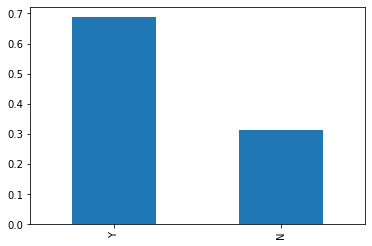

In [18]:
train['Loan_Status'].value_counts(normalize= True).plot.bar()

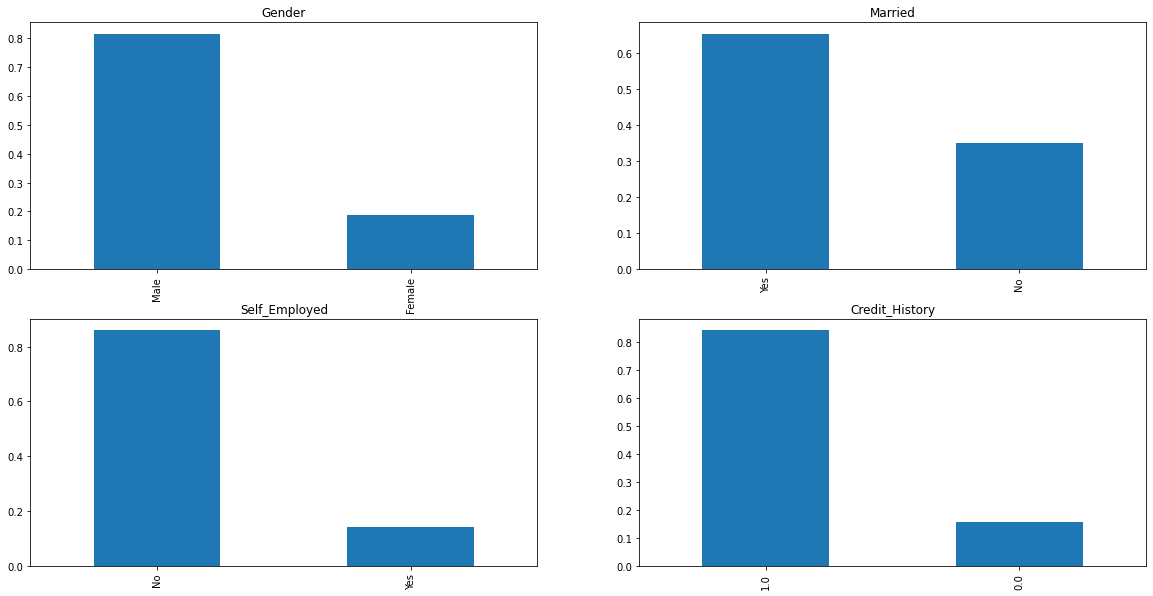

In [19]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

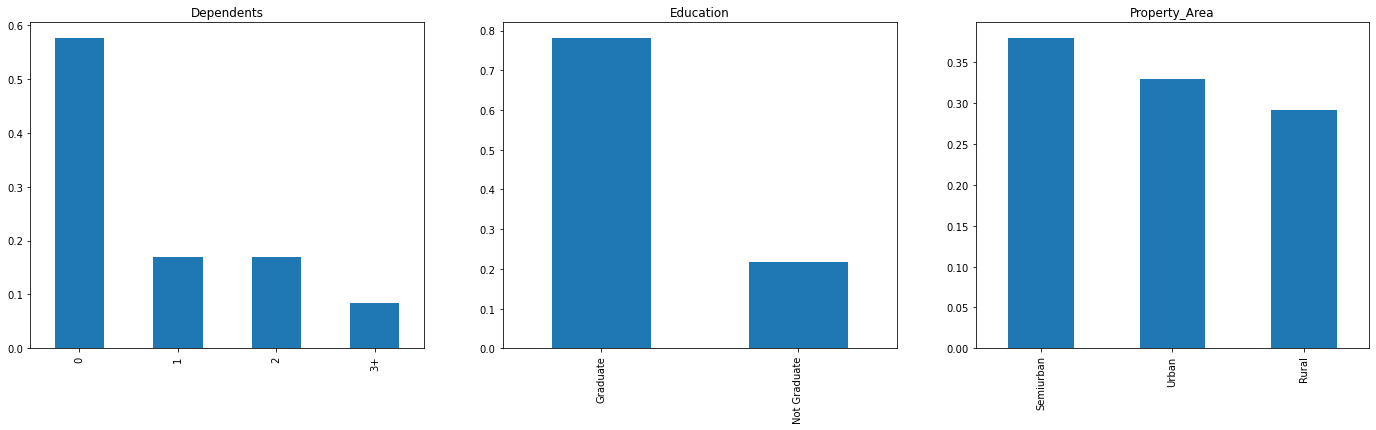

In [20]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

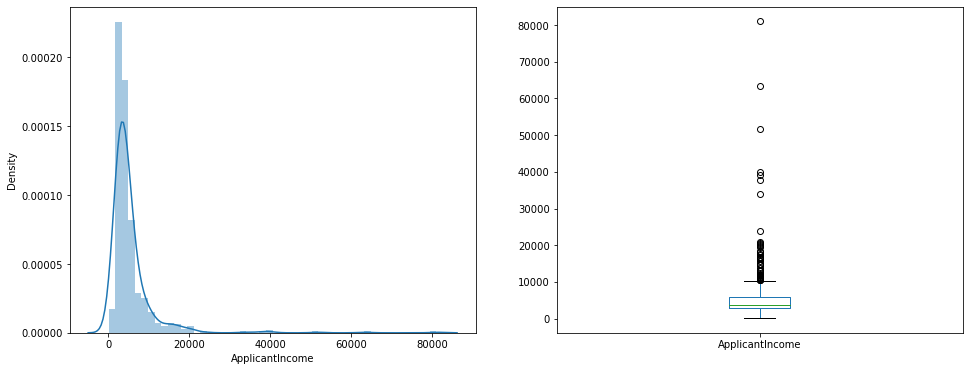

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,6))
plt.show()

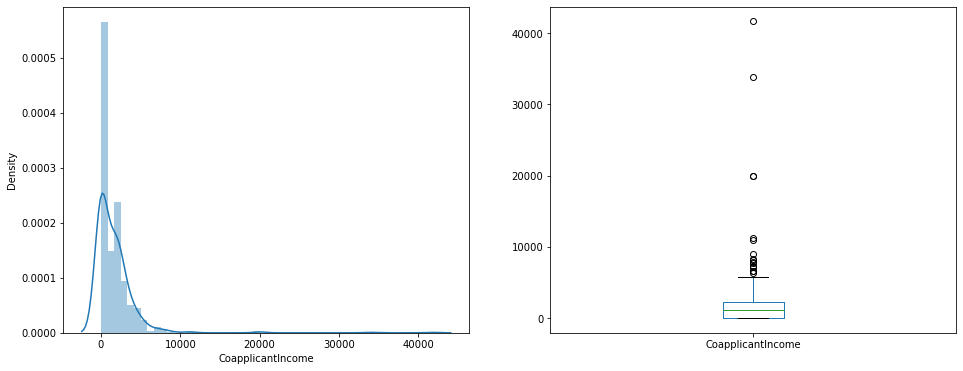

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,6))
plt.show()

Bivariate EDA

Text(0.5, 0.98, '')

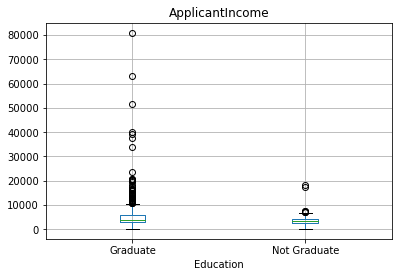

In [23]:
train.boxplot(column = 'ApplicantIncome',by = 'Education')
plt.suptitle("")

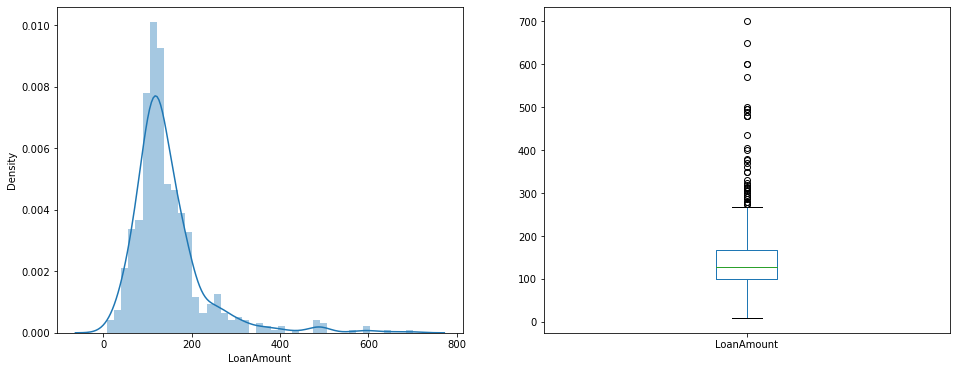

In [24]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16,6))
plt.show()

<AxesSubplot:xlabel='Gender'>

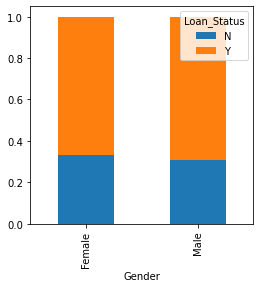

In [25]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))

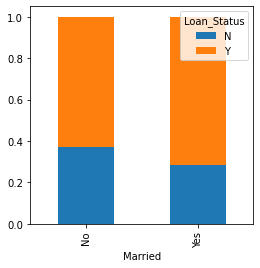

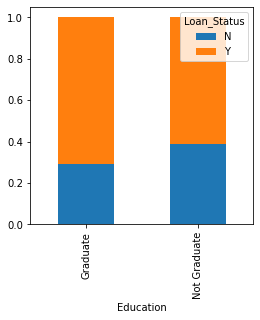

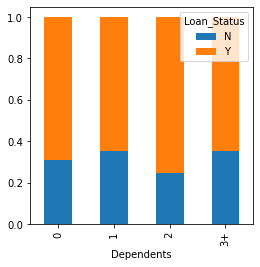

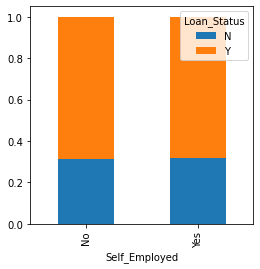

In [26]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()

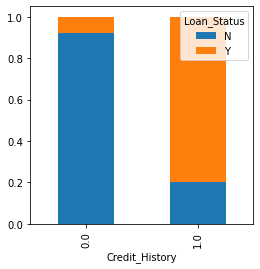

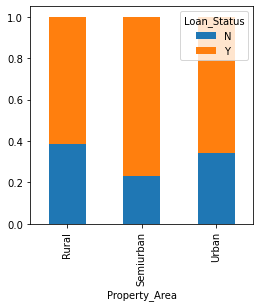

In [27]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind = "bar",stacked = True, figsize =(4,4))
plt.show()

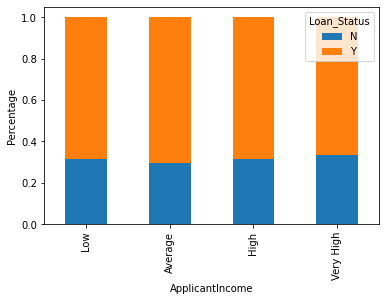

In [28]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

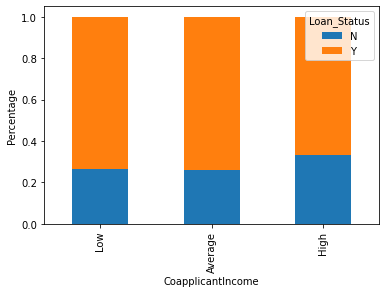

In [29]:
bins = [0,2000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

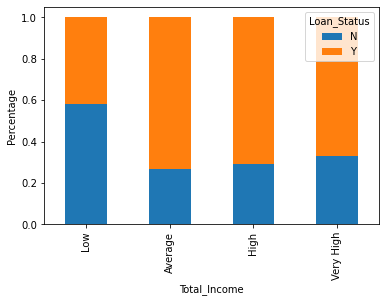

In [30]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


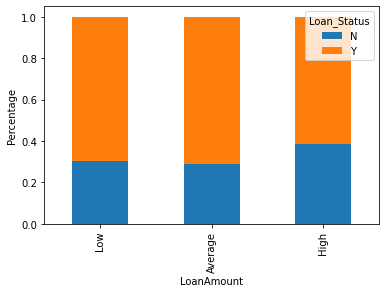

In [31]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

<AxesSubplot:>

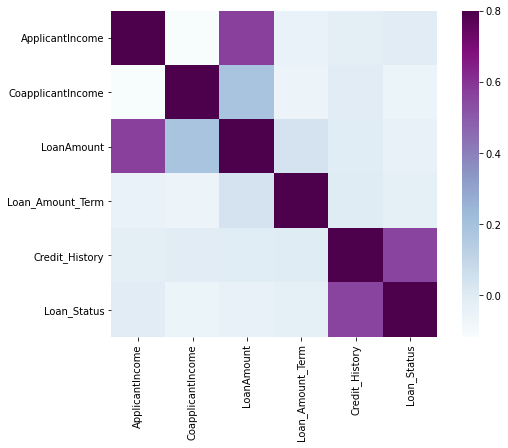

In [32]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)

matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax = 0.8,square = True,cmap = "BuPu")


Data Cleaning and Filling empty data

In [33]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)






In [35]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
 train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)


In [37]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)


In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Building the Model using Logistic Regression model

In [39]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)




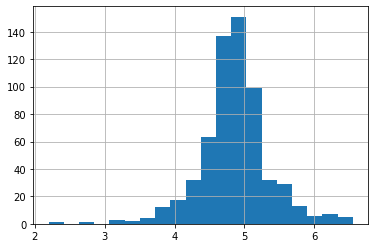

In [40]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [41]:
test=test.drop('Loan_ID',axis=1)
train=train.drop('Loan_ID',axis=1)

In [42]:
X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [43]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
LogisticRegression(C=1.0 , class_weight = None , dual = False , fit_intercept = True, intercept_scaling = 1, max_iter =100,
                  multi_class = 'ovr', n_jobs =1, penalty = 'l2', random_state = 1,solver = 'liblinear', tol = 0.0001,
                  verbose =0, warm_start = False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [48]:
pred_cv = model.predict(x_cv)

In [49]:
accuracy_score(y_cv,pred_cv)

0.8216216216216217

CONCLUSION :
We built a model with an accuracy of around 82.16%